<a href="https://colab.research.google.com/github/Machiavellil/Sleeping_Prediction/blob/main/Sleeping_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('sleeptime_prediction_dataset.csv')

In [ ]:
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


In [ ]:
df = df.drop_duplicates()
df = df.dropna()

In [ ]:
x = df
x = x.drop(["SleepTime"],axis=1)

In [ ]:
x.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000


In [ ]:
y = df["SleepTime"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
mse

3.0038057050791944

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predict)
r2

0.3116117730270723

In [ ]:
from sklearn.metrics import mean_absolute_error
mas = mean_absolute_error(y_test,y_predict)
mas

0.5698915992261631

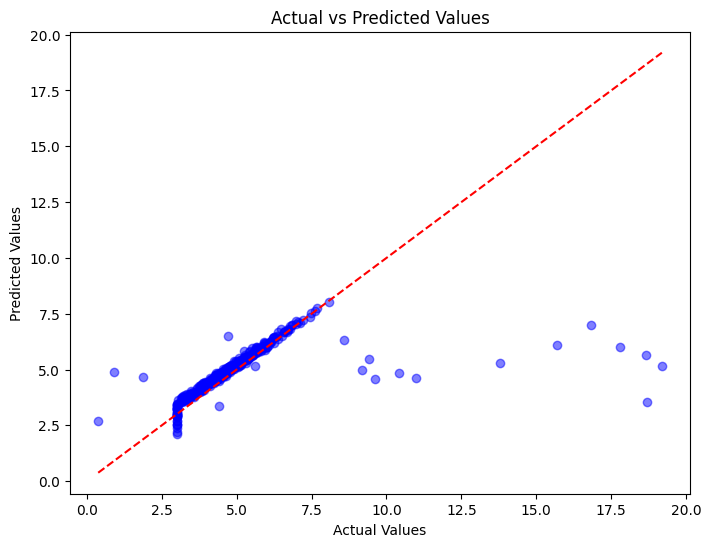

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)

# Plot the ideal line (y = x) where predictions equal actuals
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a scatter plot: Actual vs Predicted values
fig = go.Figure()

# Add actual values as scatter plot
fig.add_trace(go.Scatter(x=y_test, y=y_predict, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='blue', opacity=0.5)))

# Add the ideal line (y = x) where predictions equal actuals
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines',
                         name='Ideal Line', line=dict(color='red', dash='dash')))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Prepare the data for the table
data = {
    'Actual Values': y_test.tolist(),  # Convert to list
    'Predicted Values': y_predict.tolist()  # Convert to list
}

# Create a table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=["Index", "Actual Values", "Predicted Values"]),
    cells=dict(values=[list(range(1, len(y_test) + 1)), data['Actual Values'], data['Predicted Values']])
)])

# Update layout
fig.update_layout(title="Actual vs Predicted Values Table")

# Show the table
fig.show()